In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from matplotlib import pyplot
from pandas import datetime
from pandas import concat
import pandas as pd
import numpy as np

"PM2.5 readings are often included in air quality reports from environmental authorities and companies. PM2.5 refers to atmospheric particulate matter (PM) that have a diameter less than 2.5 micrometers. In other words, it's used as a measure of pollution"


In [2]:
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')
dataset = pd.read_csv('Data_benjin.csv',  parse_dates = [['year', 'month', 'day', 'hour']], index_col=0, date_parser=parse)
#dataset.drop('No', axis=1, inplace=True)

In [3]:
dataset.head()

,No,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,
2010-01-01 00:00:00,1,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,5,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
# load data
dataset.drop('No', axis=1, inplace=True)
# manually specify column names
dataset.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']
dataset.index.name = 'date'
print(dataset.head(30))

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-01 00:00:00        NaN  -21 -11.0  1021.0      NW     1.79     0     0
2010-01-01 01:00:00        NaN  -21 -12.0  1020.0      NW     4.92     0     0
2010-01-01 02:00:00        NaN  -21 -11.0  1019.0      NW     6.71     0     0
2010-01-01 03:00:00        NaN  -21 -14.0  1019.0      NW     9.84     0     0
2010-01-01 04:00:00        NaN  -20 -12.0  1018.0      NW    12.97     0     0
2010-01-01 05:00:00        NaN  -19 -10.0  1017.0      NW    16.10     0     0
2010-01-01 06:00:00        NaN  -19  -9.0  1017.0      NW    19.23     0     0
2010-01-01 07:00:00        NaN  -19  -9.0  1017.0      NW    21.02     0     0
2010-01-01 08:00:00        NaN  -19  -9.0  1017.0      NW    24.15     0     0
2010-01-01 09:00:00        NaN  -20  -8.0  1017.0      NW    27.28     0     0
2010-01-01 10:00:00        NaN  -19  -7.0  1017.0   

A quick check reveals NA values for pm2.5 for the first 24 hours. We will, therefore, need to remove the first row of data. There are also a few scattered “NA” values later in the dataset; we can mark them with 0 values for now.

In [5]:
# mark all NA values with 0
dataset['pollution'].fillna(0, inplace=True)
# drop the first 24 hours
dataset = dataset[24:]
# summarize first 5 rows
print(dataset.head(5))
# save to file
dataset.to_csv('pollution.csv')

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


In [6]:
np.shape(dataset)

(43800, 8)

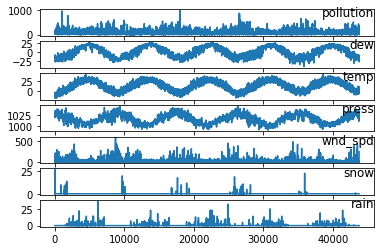

In [17]:
# load dataset
dataset = pd.read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1
# plot each column
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show()

In [19]:
dataset.dtypes 

pollution    float64
dew            int64
temp         float64
press        float64
wnd_dir       object
wnd_spd      float64
snow           int64
rain           int64
dtype: object

In [22]:
from sklearn import preprocessing
# load dataset
#dataset = pd.read_csv('pollution.csv', header=0, index_col=0)
values = dataset.values
# integer encode direction
# wnd_dir column change to categorical
encoder = preprocessing.LabelEncoder()
values[:,4] = encoder.fit_transform(values[:,4])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [23]:
np.shape(scaled)

(43800, 8)

In [24]:
df = pd.DataFrame(scaled)
df.head()

,0,1,2,3,4,5,6,7
0,0.129779,0.352941,0.245902,0.527273,0.666667,0.002290,0.000000,0.0
1,0.148893,0.367647,0.245902,0.527273,0.666667,0.003811,0.000000,0.0
2,0.159960,0.426471,0.229508,0.545454,0.666667,0.005332,0.000000,0.0
3,0.182093,0.485294,0.229508,0.563637,0.666667,0.008391,0.037037,0.0
4,0.138833,0.485294,0.229508,0.563637,0.666667,0.009912,0.074074,0.0


Here we generate a column with one shift of polution as the dependent variale. Having all the weather condition at time t we Predict the pollution for the t+1 .

In [25]:
n_in=1 
n_out=1 
dropnan=True

n_vars = scaled.shape[1]
cols, names = list(), list()

# input sequence (t-n, ... t-1)
for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]

# forecast sequence (t, t+1, ... t+n)
for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

# put it all together
reframed = concat(cols, axis=1)
reframed.columns = names

# drop rows with NaN values
reframed.dropna(inplace=True)

# drop columns we don't want to predict
reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.129779   0.352941   0.245902   0.527273   0.666667   0.002290   
2   0.148893   0.367647   0.245902   0.527273   0.666667   0.003811   
3   0.159960   0.426471   0.229508   0.545454   0.666667   0.005332   
4   0.182093   0.485294   0.229508   0.563637   0.666667   0.008391   
5   0.138833   0.485294   0.229508   0.563637   0.666667   0.009912   

   var7(t-1)  var8(t-1)   var1(t)  
1   0.000000        0.0  0.148893  
2   0.000000        0.0  0.159960  
3   0.000000        0.0  0.182093  
4   0.037037        0.0  0.138833  
5   0.074074        0.0  0.109658  


In [26]:
np.shape(reframed)

(43799, 9)

We train on one year weather data and predict the rest

In [27]:
values = reframed.values
n_train_hours = 365 * 24
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(8760, 1, 8) (8760,) (35039, 1, 8) (35039,)


In [28]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 50)                11800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 11,851
Trainable params: 11,851
Non-trainable params: 0
_________________________________________________________________


Train on 8760 samples, validate on 35039 samples
Epoch 1/50
 - 1s - loss: 0.0519 - val_loss: 0.0561
Epoch 2/50
 - 0s - loss: 0.0349 - val_loss: 0.0606
Epoch 3/50
 - 0s - loss: 0.0217 - val_loss: 0.0526
Epoch 4/50
 - 0s - loss: 0.0176 - val_loss: 0.0460
Epoch 5/50
 - 0s - loss: 0.0163 - val_loss: 0.0327
Epoch 6/50
 - 0s - loss: 0.0152 - val_loss: 0.0215
Epoch 7/50
 - 0s - loss: 0.0150 - val_loss: 0.0201
Epoch 8/50
 - 0s - loss: 0.0149 - val_loss: 0.0177
Epoch 9/50
 - 0s - loss: 0.0148 - val_loss: 0.0163
Epoch 10/50
 - 1s - loss: 0.0148 - val_loss: 0.0160
Epoch 11/50
 - 1s - loss: 0.0147 - val_loss: 0.0152
Epoch 12/50
 - 0s - loss: 0.0146 - val_loss: 0.0148
Epoch 13/50
 - 1s - loss: 0.0146 - val_loss: 0.0144
Epoch 14/50
 - 0s - loss: 0.0146 - val_loss: 0.0141
Epoch 15/50
 - 0s - loss: 0.0145 - val_loss: 0.0138
Epoch 16/50
 - 1s - loss: 0.0146 - val_loss: 0.0137
Epoch 17/50
 - 0s - loss: 0.0145 - val_loss: 0.0136
Epoch 18/50
 - 0s - loss: 0.0146 - val_loss: 0.0136
Epoch 19/50
 - 1s - loss

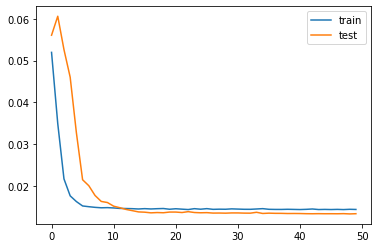

In [29]:
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [30]:
# make a prediction
yhat = model.predict(test_X)

In [31]:
test_X1 = test_X.reshape((test_X.shape[0], test_X.shape[2]))

In [32]:
from numpy import concatenate
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X1[:,1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

In [64]:
from math import sqrt
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X1[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 26.402
